In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
import tqdm


## Let's consider only electron spin and see what's the effect of off-axis magnetic field

First:
1. There is no misalignment
2. In Rotating Frame with Rotating wave approximation

In [107]:
#NV in (0, -1) subspace
Sz = (sigmaz()-qeye(2))*0.5
Sx = sigmax()/2
Sy = sigmay()/2

Om_R = 2*np.pi*0.1  # MHz
Delta = 2*np.pi*0.05  # MHz

H = Delta*Sz+ Om_R *Sx # Hamiltonian
psi0 = basis(2,0) # initial state
tlist = np.linspace(0, 20, 10000) # in us: list of times for which the solver should store the state vector
result = mesolve(H, psi0, tlist, [], [])

<IPython.core.display.Javascript object>


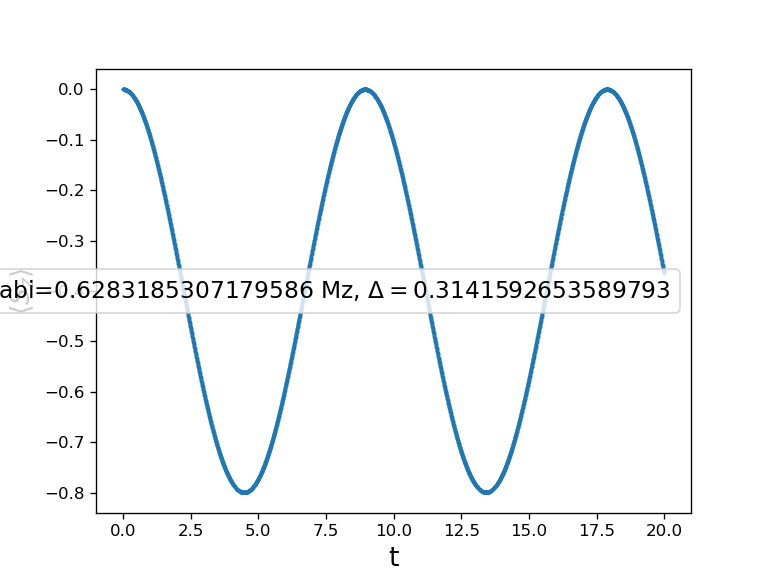

In [108]:
%matplotlib notebook
plt.figure(dpi = 120)
plt.plot(tlist, expect(Sz, result.states),'-o',markersize=1,
         label='Rabi={} Mz,'.format(Om_R/(2*np.pi))+' $\Delta={}$'.format(Delta/(2*np.pi)))
plt.xlabel("t", fontsize=16)
plt.ylabel(r'$\left<S_z\right>$', fontsize=16)
plt.legend(fontsize=14)

# Now we do NOT go to RF and we are in lab frame

In [119]:
#NV in (0, -1) subspace
Sz = (sigmaz()-qeye(2))/2
Sx = sigmax()
Sy = sigmay()/2


Om_R = 2*np.pi*0.1  # MHz


B = 100 # Gaus
gamma_e = 2.8 #MHz/G
om_z = 2*np.pi*gamma_e*B          # MHz

def H1_coeff(t, args):
    return np.cos(om_z*t) # Hamiltonian
H = [om_z*Sz, [Om_R*Sx ,H1_coeff]]
psi0 = basis(2,0) # initial state
tlist = np.linspace(0, 20, 5000) # in us: list of times for which the solver should store the state vector
result = mesolve(H, psi0, tlist, [], [])

<IPython.core.display.Javascript object>


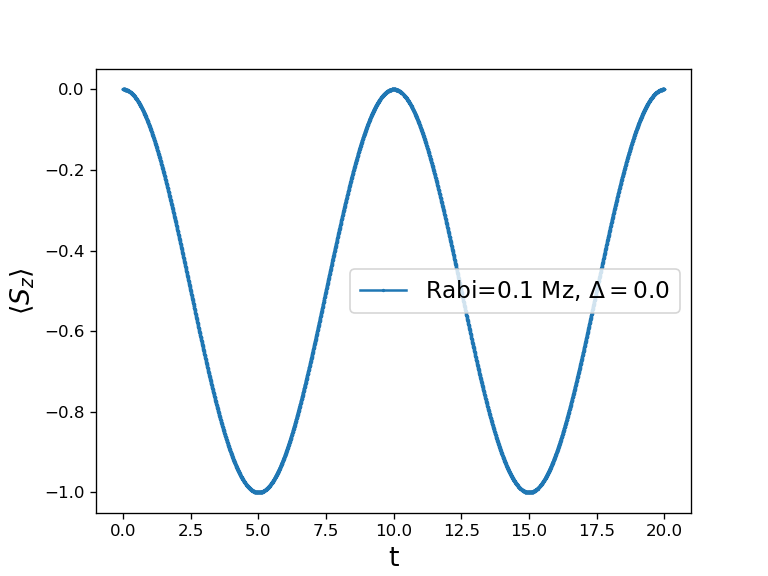

In [120]:
%matplotlib notebook
plt.figure(dpi = 120)
plt.plot(tlist, expect(Sz, result.states),'-o',markersize=1,
         label='Rabi={} Mz,'.format(Om_R/(2*np.pi))+' $\Delta={}$'.format(Delta/(2*np.pi)))
plt.xlabel("t", fontsize=16)
plt.ylabel(r'$\left<S_z\right>$', fontsize=16)
plt.legend(fontsize=14)

In [123]:
#NV in (0, -1) subspace
Sz = (sigmaz()-qeye(2))/2
Sx = sigmax()
Sy = sigmay()/2


Om_R = 2*np.pi*0.1  # MHz
Delta = 2*np.pi*0  # MHz
D = 2*np.pi*1 # MHz


tet = 0 *np.pi/180 # off-axis angle
phi = 0 *np.pi/180 # off-axis angle phi
B = 100 # Gaus
gamma_e = 2.8 #MHz/G
om_z = 2*np.pi*gamma_e*B*np.cos(tet)             # MHz
om_x = 2*np.pi*gamma_e*B*np.sin(tet)*np.cos(phi) # MHz
om_y = 2*np.pi*gamma_e*B*np.sin(tet)*np.sin(phi) # MHz

def H1_coeff(t, args):
    return np.cos((om_z-Delta)*t) # Hamiltonian
H = [D*Sz*Sz+om_z*Sz, [Om_R*Sx ,H1_coeff]]
psi0 = basis(2,0) # initial state
tlist = np.linspace(0, 20, 5000) # in us: list of times for which the solver should store the state vector
result = mesolve(H, psi0, tlist, [], [])

<IPython.core.display.Javascript object>


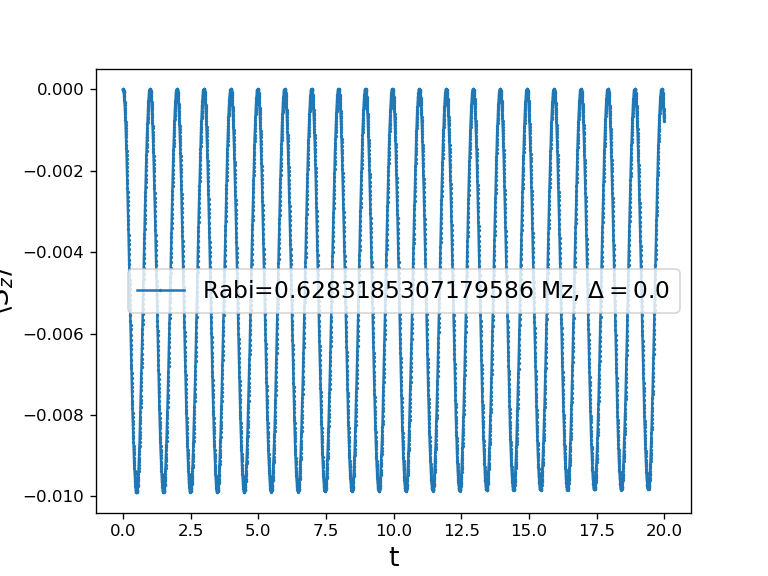

In [124]:
%matplotlib notebook
plt.figure(dpi = 120)
plt.plot(tlist, expect(Sz, result.states),'-o',markersize=1,
         label='Rabi={} Mz,'.format(Om_R)+' $\Delta={}$'.format(Delta))
plt.xlabel("t", fontsize=16)
plt.ylabel(r'$\left<S_z\right>$', fontsize=16)
plt.legend(fontsize=14)

In [12]:
#NV in (0, -1) subspace
Sz = (sigmaz()-qeye(2))*0.5
Sx = sigmax()
Sy = sigmay()

D = 2.87e3 # MHz
gamma_e = 2.8 #MHz/G
Om_R = 0.01  # MHz
Delta = 1  # MHz
B = 300 # Gaus


tet = 0.5*np.pi/180 # off-axis angle
phi = 0*np.pi*180 # off-axis angle phi
om_z = gamma_e*B*np.cos(tet)             # MHz
om_x = gamma_e*B*np.sin(tet)*np.cos(phi) # MHz
om_y = gamma_e*B*np.sin(tet)*np.sin(phi) # MHz


H = D*Sz*Sz + om_z*Sz+ (om_x + Om_R * np.cos())*Sx+ om_y*Sy

In [5]:
print(qeye(2))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]


In [95]:
2*np.pi/0.1

62.83185307179586